In [1]:
## Import Packages
import numpy as np
import _pickle as pk
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
Source = '/Users/johnvirgin/OneDrive - University of Waterloo/Papers/GMD_CanESM/'

In [3]:
land_mask = np.isnan(np.mean(pk.load(\
    open(Source+'Data/CanESM2/Climatology/CanESM2_SST_Climo.pi','rb')),axis=0))
land_valid = np.isfinite(np.mean(pk.load(\
    open(Source+'Data/CanESM2/Climatology/CanESM2_SST_Climo.pi','rb')),axis=0))

In [4]:
mods = ['CanESM2','CanESM5_p2']

dSST = {}
for i in range(len(mods)):
    dSST[mods[i]] = pk.load(open(Source+'Data/'+mods[i]+'/CFMIP/Tier 1/'+mods[i]+'_dSST.pi','rb'))

In [5]:
#define grid and weights
lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [6]:
plot = {}
gam = {}
for m in dSST.keys():
    plot[m] = {}
    gam[m] = {}
    for x in dSST[m].keys():
        plot[m][x] = np.nanmean(dSST[m][x],axis=0)
        plot[m][x][land_mask == True] = np.nan
        gam[m][x] = np.average(plot[m][x][land_valid],weights=coslat[land_valid])
        plot[m][x] = np.concatenate((plot[m][x][:,64:],plot[m][x][:,0:64]),axis=1)
        plot[m][x],lon_cyc = add_cyclic_point(plot[m][x],lon)

In [7]:
piforce = pk.load(open(Source+'Data/CanESM5_p2/CFMIP/Tier 2/CanESM5_p2_dSST_piForcing.pi','rb'))
plt_pf = np.nanmean(piforce,axis=0)
gam_pf = np.average(plt_pf[land_valid],weights=coslat[land_valid])
plt_pf = np.concatenate((plt_pf[:,64:],plt_pf[:,0:64]),axis=1)
plt_pf,lon_cyc = add_cyclic_point(plt_pf,lon)

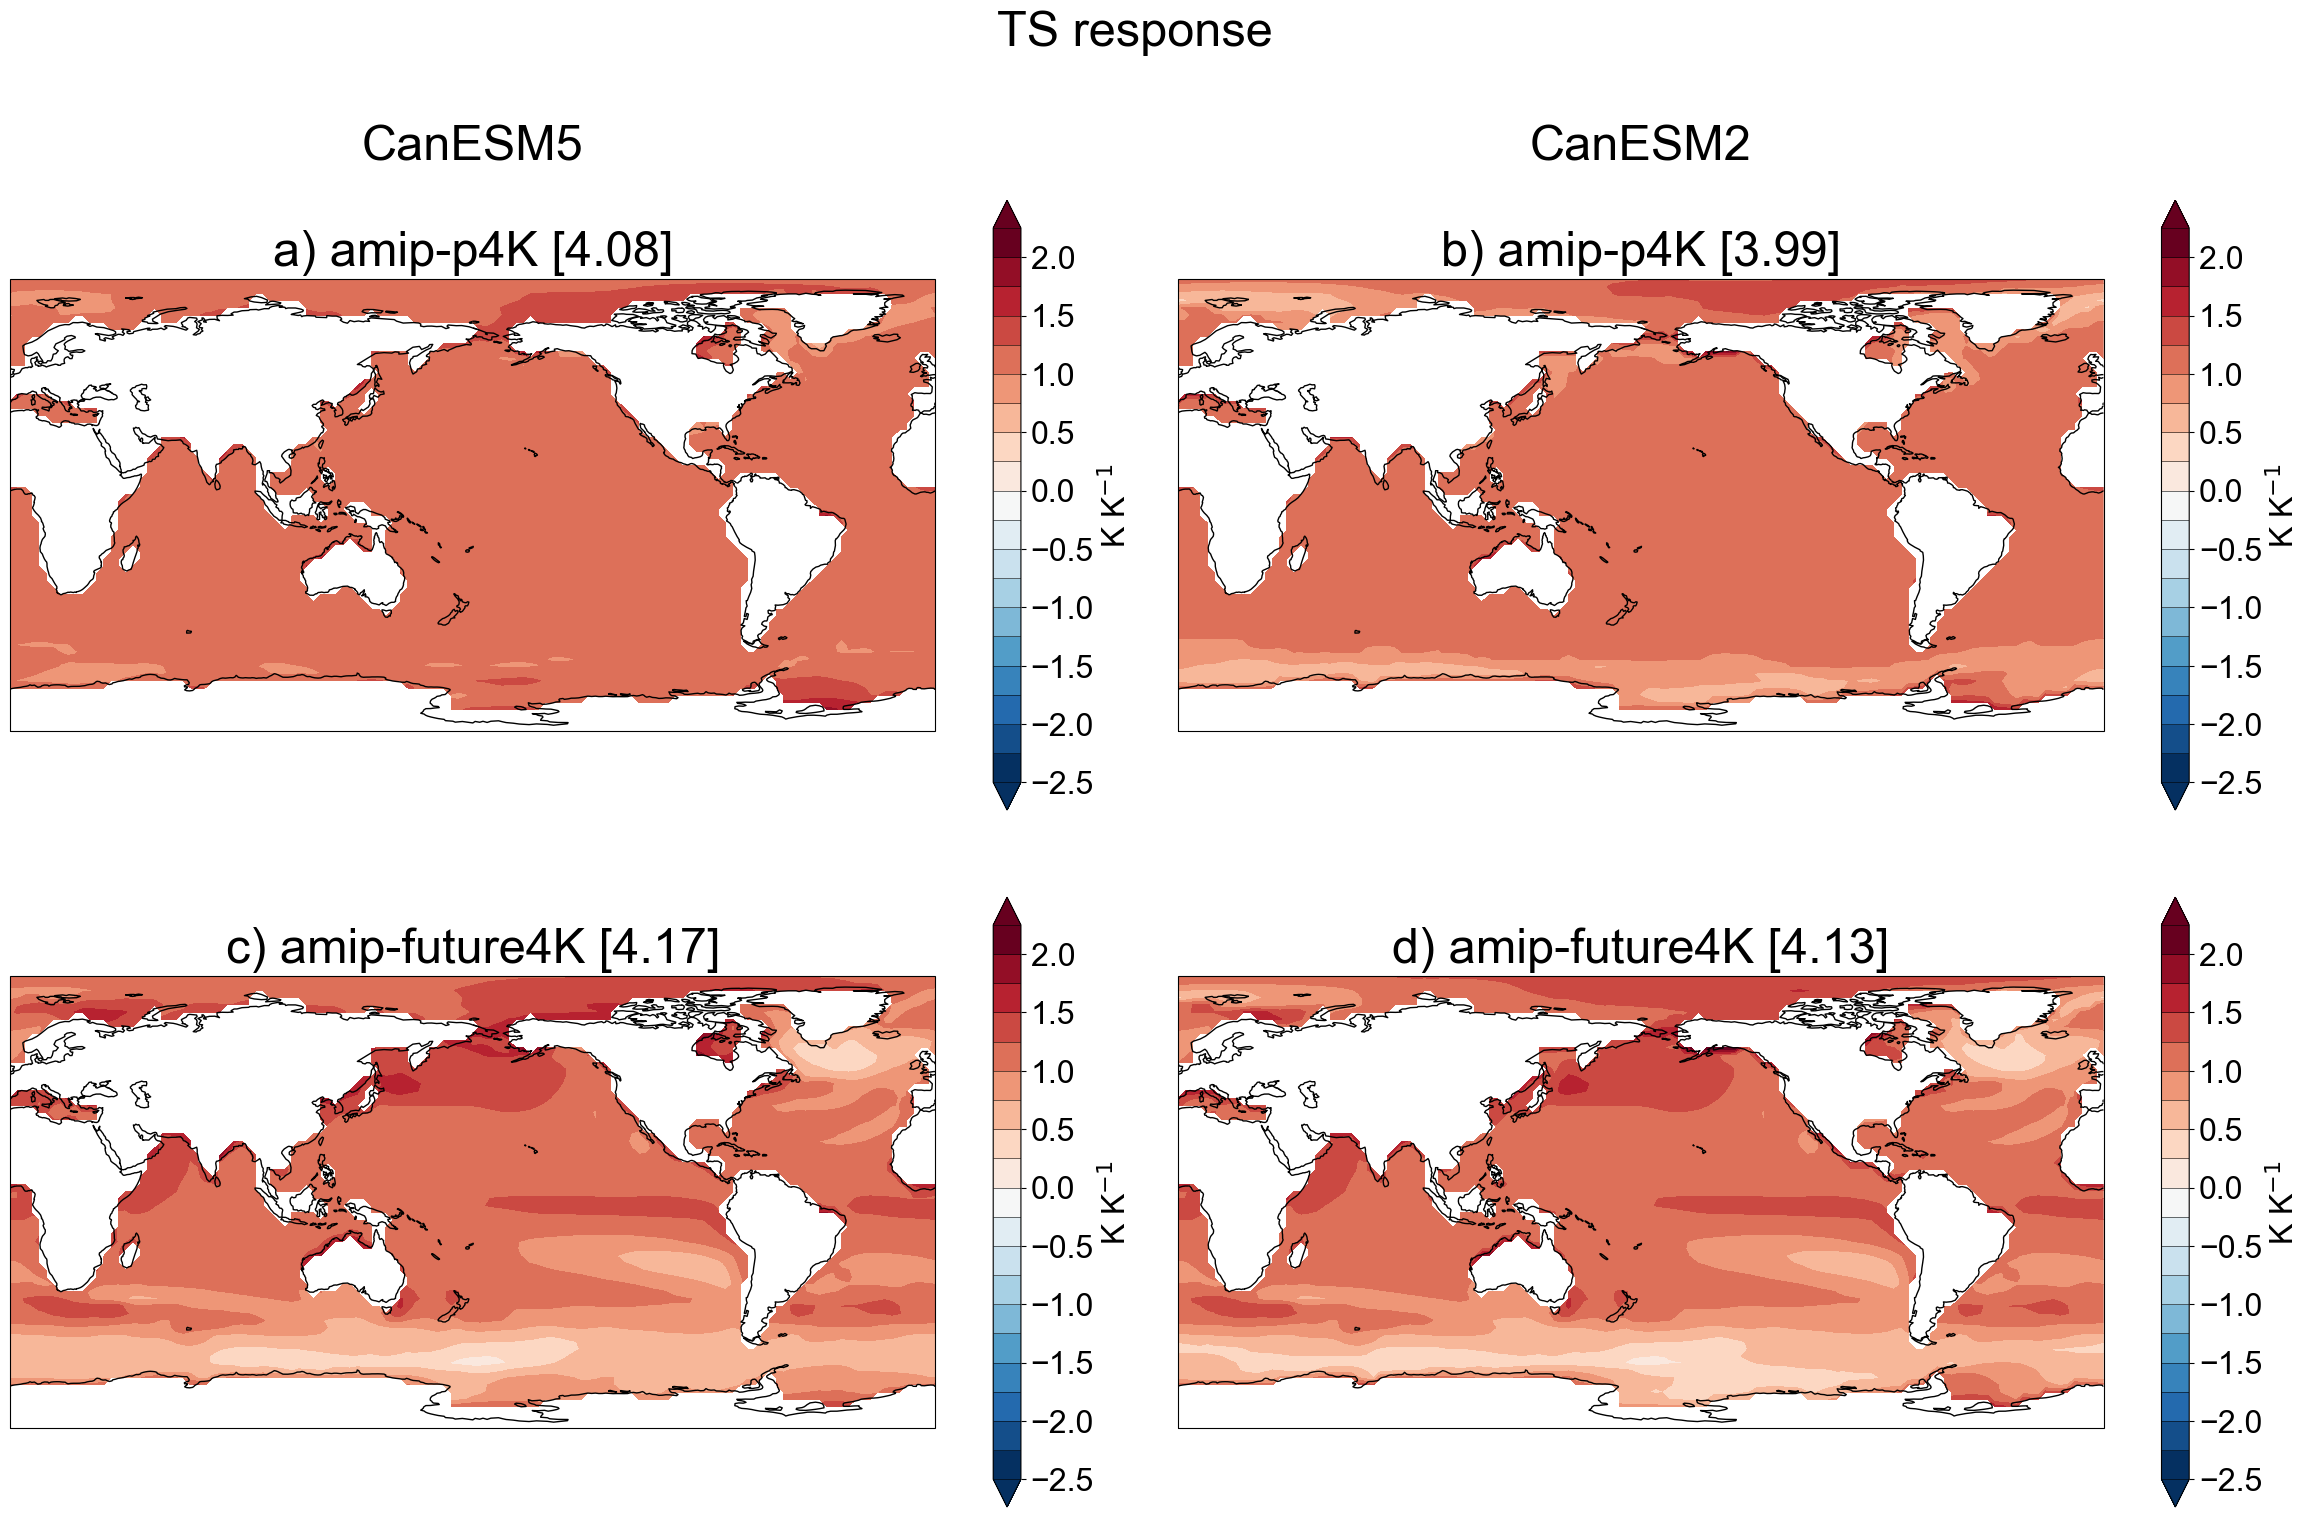

In [8]:
mpl.rc('font',size=23,**{'family':'sans-serif','sans-serif':['Arial']})

cmap = plt.cm.RdBu_r
bounds_diff = np.arange(-2.5,2.5,0.25)
bounds_diff_ticks = np.arange(-2.5,2.5,0.5)
norm_diff = mpl.colors.BoundaryNorm(bounds_diff, cmap.N)

exps = list(dSST.keys())
fig = plt.figure(figsize=(30,30),dpi=100)
plt.suptitle('TS response',fontsize=35,y=0.9)
#gs = gridspec.GridSpec(3,2, width_ratios=[0.6,1],height_ratios=[1,1,1])


ax = plt.subplot(321,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('CanESM5\n\na) amip-p4K [{}]'.format(round(gam['CanESM5_p2']['Uniform'],2)),fontsize=35,pad=10)
im = ax.contourf(lon_cyc,lat,plot['CanESM5_p2']['Uniform']/3.95,\
                 bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax.coastlines()
plt.colorbar(im,ticks=bounds_diff_ticks,drawedges=True,label='K K$^{-1}$',shrink=0.7)

ax1 = plt.subplot(322,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_title('CanESM2\n\nb) amip-p4K [{}]'.format(round(gam['CanESM2']['Uniform'],2)),fontsize=35,pad=10)
im1 = ax1.contourf(lon_cyc,lat,plot['CanESM2']['Uniform']/3.95,bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax1.coastlines()
plt.colorbar(im1,ticks=bounds_diff_ticks,drawedges=True,label='K K$^{-1}$',shrink=0.7)

ax2 = plt.subplot(323,projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_title('c) amip-future4K [{}]'.format(round(gam['CanESM5_p2']['Pattern'],2)),fontsize=35,pad=10)
im2 = ax2.contourf(lon_cyc,lat,plot['CanESM5_p2']['Pattern']/3.95,bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax2.coastlines()
plt.colorbar(im2,ticks=bounds_diff_ticks,drawedges=True,label='K K$^{-1}$',shrink=0.7)

ax3 = plt.subplot(324,projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_title('d) amip-future4K [{}]'.format(round(gam['CanESM2']['Pattern'],2)),fontsize=35,pad=10)
im3 = ax3.contourf(lon_cyc,lat,plot['CanESM2']['Pattern']/3.95,bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax3.coastlines()
plt.colorbar(im3,ticks=bounds_diff_ticks,drawedges=True,label='K K$^{-1}$',shrink=0.7)

plt.subplots_adjust(wspace=0.01,hspace=-0.2)

plt.savefig('CanESM_CFMIP_T1_dSST.png',bbox_inches='tight')